# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
%matplotlib ipympl


from setup_data import setup_as_data, setup_an_data
from utils import time_period, plot_dfs

## austevoll soor

### Get data

In [2]:
Austevoll_Sor_file_path = "row_data\\Austevoll_Sor\\Austevoll_data_instrument.feather"
print(Austevoll_Sor_file_path)
Austevoll_Sor_df = pd.read_feather(Austevoll_Sor_file_path)
Austevoll_Sor_df.set_index('Time', inplace=True)
len(Austevoll_Sor_df)

row_data\Austevoll_Sor\Austevoll_data_instrument.feather


22393

In [3]:
len(Austevoll_Sor_df.columns)

51

In [4]:
for col in Austevoll_Sor_df.columns:
    print(col)

Long
Lat
Doppler_Current_Profiler_Sensor.Heading
Doppler_Current_Profiler_Sensor.Abs_Tilt
Doppler_Current_Profiler_Sensor.Max_Tilt
Doppler_Current_Profiler_Sensor.Record_State
Doppler_Current_Profiler_Sensor.Ping_Count
Conductivity_Sensor.Conductivity
Conductivity_Sensor.Temperature
Conductivity_Sensor.Salinity
Conductivity_Sensor.Density
Conductivity_Sensor.Soundspeed
Pressure_Sensor.Pressure
Pressure_Sensor.Temperature
Analog_Sensors.Chlorophyll#2103755
System_Parameters.Input_Voltage
System_Parameters.Memory_Used
SeaBird_SBE.Temperature
SeaBird_SBE.Conductivity
SeaBird_SBE.Pressure
SeaBird_SBE.Oxygen
SeaBird_SBE.Sound_Velocity
Oxygen_Optode.O2Concentration
Oxygen_Optode.AirSaturation
Oxygen_Optode.Temperature
Oxygen_Optode.CalPhase
Oxygen_Optode.TCPhase
Oxygen_Optode.C1RPh
Oxygen_Optode.C2RPh
Oxygen_Optode.C1Amp
Oxygen_Optode.C2Amp
Oxygen_Optode.RawTemp
Temperature_Sensor.Temperature
Temperature_Sensor.Rawdata_Temperature
Tide_Sensor.Pressure
Tide_Sensor.Temperature
Tide_Sensor.Tide

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


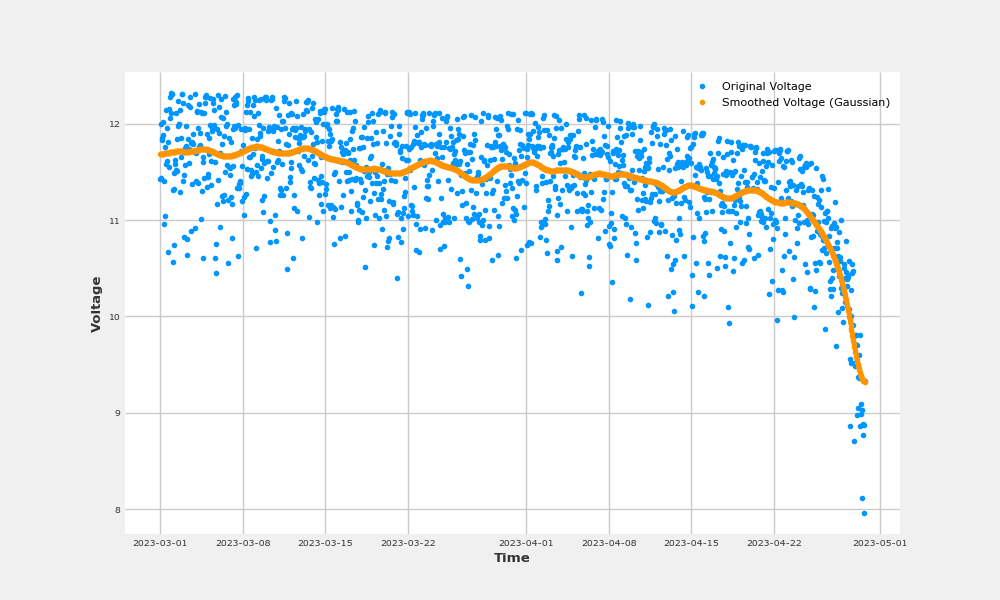

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


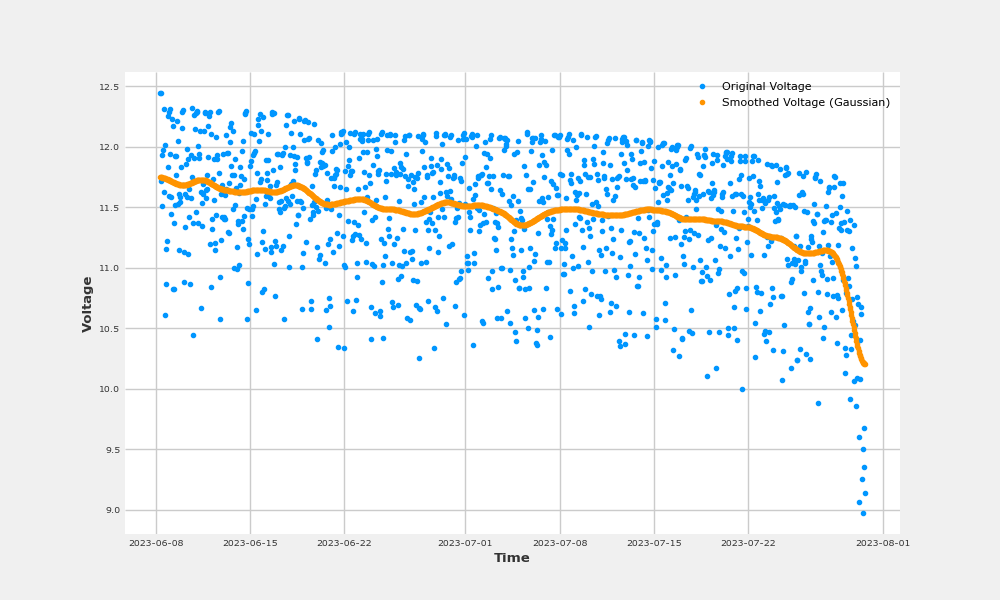

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


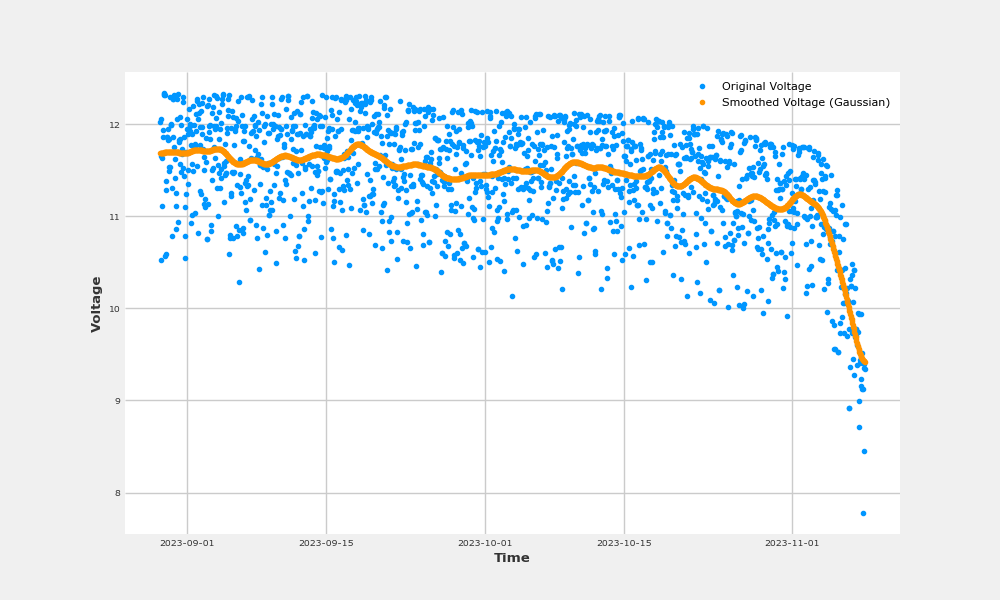

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


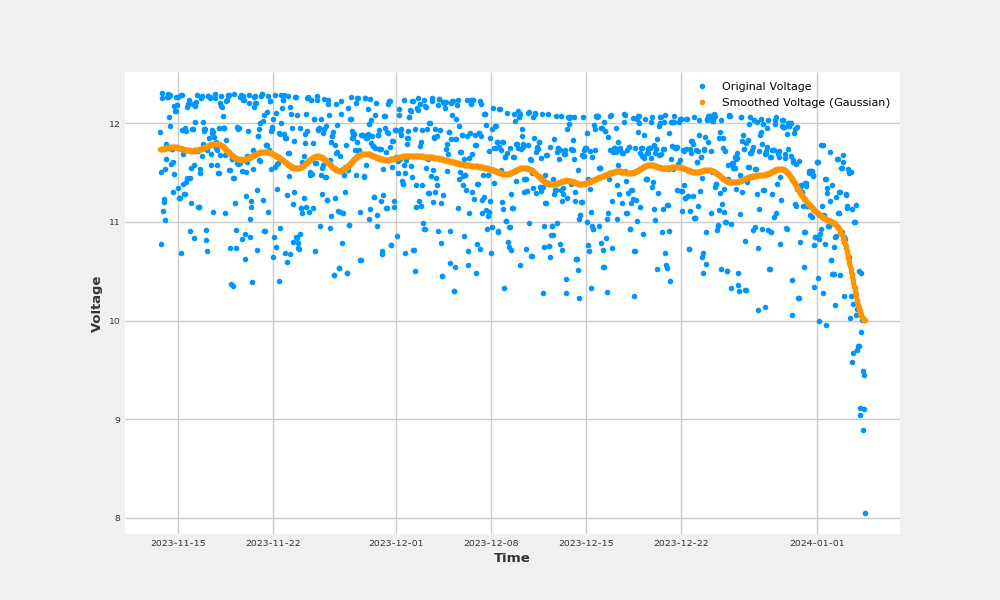

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


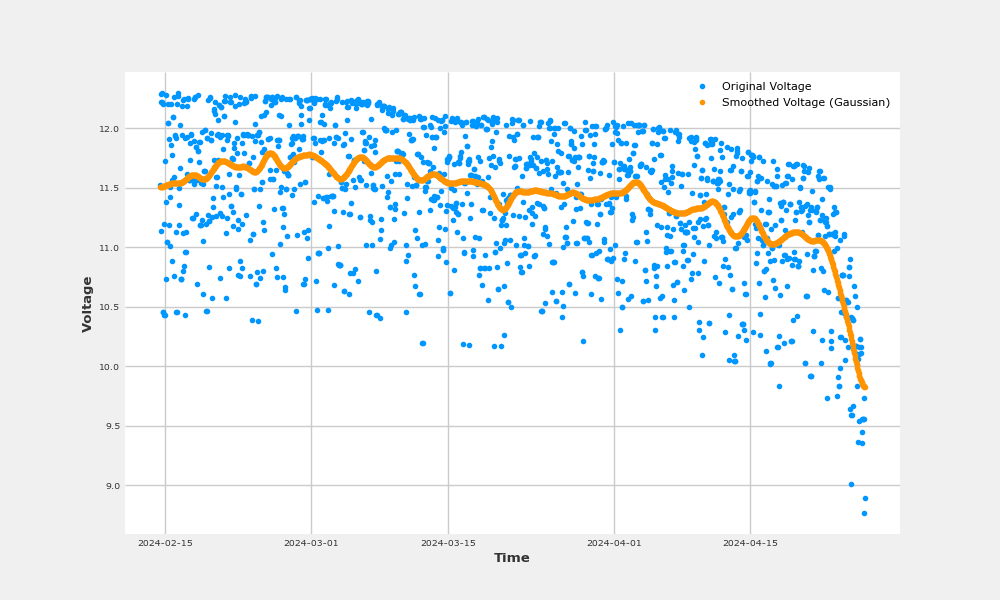

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


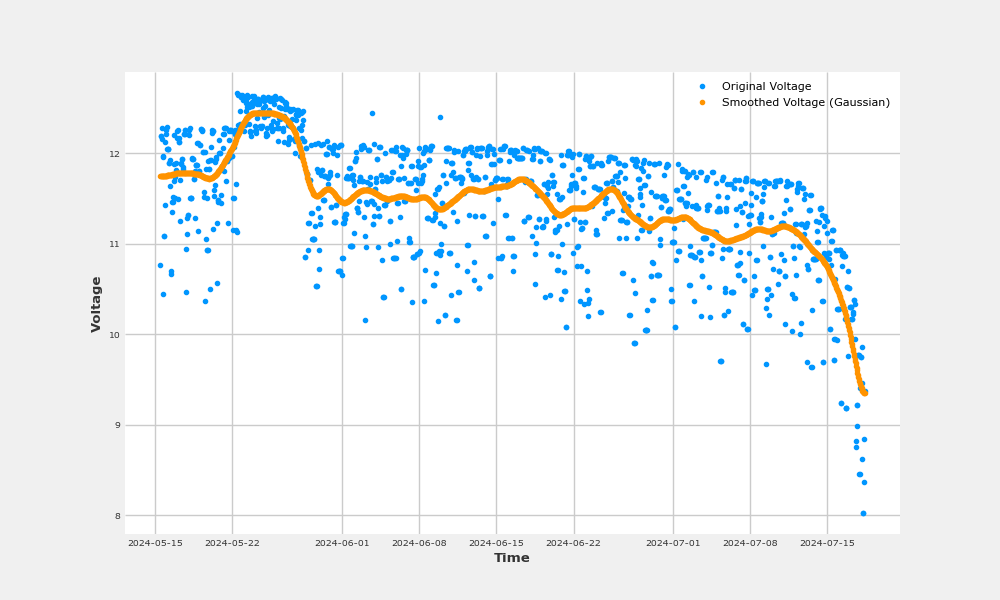

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


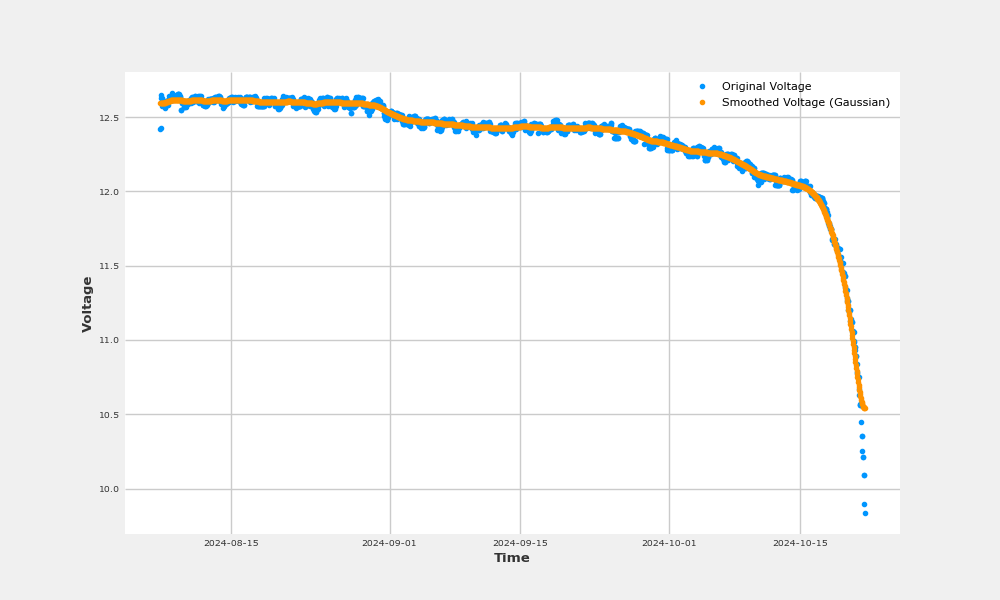

In [5]:
as_list_segments = [3, 4, 5, 6, 7, 8, 9]
Austevoll_Sor_df_segments = setup_as_data(Austevoll_Sor_df, smooth_sigma=18, list_segments=as_list_segments)

In [6]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'Voltage_Lag1', 'Voltage_Diff',
       'Voltage_Change_Rate', 'Rolling_Mean_Voltage', 'Rolling_Max_Voltage',
       'Rolling_Std_Voltage'],
      dtype='object')

### Normalize input voltage for each segment using Scalar

In [7]:
from feature_adder import normalize_data

as_seg_scalers_iv = {}

for seg_key, seg_df in Austevoll_Sor_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'System_Parameters.Input_Voltage')
    
    Austevoll_Sor_df_segments[seg_key] = seg_df
    
    as_seg_scalers_iv[seg_key] = scaler_y
    

as_seg_scalers_siv = {}
for seg_key, seg_df in Austevoll_Sor_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'smooth_System_Parameters.Input_Voltage')
    
    Austevoll_Sor_df_segments[seg_key] = seg_df
    
    as_seg_scalers_siv[seg_key] = scaler_y

as_seg_scalers_iv, as_seg_scalers_siv

({3: Scaler, 4: Scaler, 5: Scaler, 6: Scaler, 7: Scaler, 8: Scaler, 9: Scaler},
 {3: Scaler, 4: Scaler, 5: Scaler, 6: Scaler, 7: Scaler, 8: Scaler, 9: Scaler})

In [8]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'Voltage_Lag1', 'Voltage_Diff',
       'Voltage_Change_Rate', 'Rolling_Mean_Voltage', 'Rolling_Max_Voltage',
       'Rolling_Std_Voltage', 'System_Parameters.Input_Voltage_n',
       'smooth_System_Parameters.Input_Voltage_n'],
      dtype='object')

### concatinate ausevold soor data

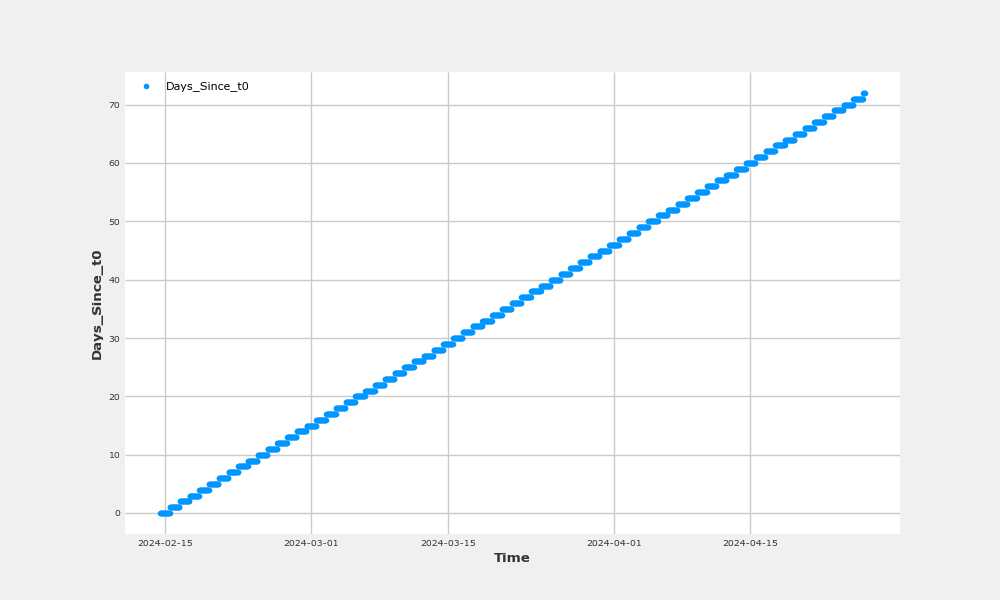

In [9]:
plot_dfs([Austevoll_Sor_df_segments[7][['Days_Since_t0']]])

In [10]:
over_samp_number = 5
dead_voltage = 11

Austevoll_Sor_df_segments_3 = Austevoll_Sor_df_segments[3].copy()
critical_df_3 = Austevoll_Sor_df_segments_3[Austevoll_Sor_df_segments_3['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_3 = pd.concat([Austevoll_Sor_df_segments_3, *[critical_df_3]*over_samp_number])


Austevoll_Sor_df_segments_4 = Austevoll_Sor_df_segments[4].copy()
critical_df_4 = Austevoll_Sor_df_segments_4[Austevoll_Sor_df_segments_4['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_4 = pd.concat([Austevoll_Sor_df_segments_4, *[critical_df_4]*over_samp_number])

Austevoll_Sor_df_segments_5 = Austevoll_Sor_df_segments[5].copy()
critical_df_5 = Austevoll_Sor_df_segments_5[Austevoll_Sor_df_segments_5['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_5 = pd.concat([Austevoll_Sor_df_segments_5, *[critical_df_5]*over_samp_number])

Austevoll_Sor_df_segments_6 = Austevoll_Sor_df_segments[6].copy()
critical_df_6 = Austevoll_Sor_df_segments_6[Austevoll_Sor_df_segments_6['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_6 = pd.concat([Austevoll_Sor_df_segments_6, *[critical_df_6]*over_samp_number])


Austevoll_Sor_df_segments_7 = Austevoll_Sor_df_segments[7].copy()
critical_df_7 = Austevoll_Sor_df_segments_7[Austevoll_Sor_df_segments_7['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_7 = pd.concat([Austevoll_Sor_df_segments_7, *[critical_df_7]*over_samp_number])


Austevoll_Sor_df_segments_8 = Austevoll_Sor_df_segments[8].copy()
critical_df_8 = Austevoll_Sor_df_segments_8[Austevoll_Sor_df_segments_8['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_8 = pd.concat([Austevoll_Sor_df_segments_8, *[critical_df_8]*over_samp_number])


Austevoll_Sor_df_segments_9 = Austevoll_Sor_df_segments[9].copy()
critical_df_9 = Austevoll_Sor_df_segments_9[Austevoll_Sor_df_segments_9['smooth_System_Parameters.Input_Voltage'] < dead_voltage]
oversampled_df_9 = pd.concat([Austevoll_Sor_df_segments_9, *[critical_df_9]*over_samp_number])

as_df = pd.concat(
    [
        oversampled_df_3,
        oversampled_df_4,
        oversampled_df_5,
        #oversampled_df_6,
        oversampled_df_7,
        #oversampled_df_8,
        #oversampled_df_9,
    ]
)

In [11]:
over_samp_number = 3
dead_voltage = 11.5
tail_pad = 3  # Number of identical rows to add at the end

def oversample_and_pad(segment_df):
    # Make a copy
    df = segment_df.copy()

    # Find critical voltage rows
    critical_df = df[df['smooth_System_Parameters.Input_Voltage'] < dead_voltage]

    # Oversample critical region
    oversampled_df = pd.concat([df, *[critical_df] * over_samp_number])

    # Repeat the last row 'tail_pad' times
    last_row = oversampled_df.iloc[[-1]]  # keep it as DataFrame
    padded_rows = pd.concat([last_row] * tail_pad)

    # Final oversampled and padded segment
    return pd.concat([oversampled_df, padded_rows])


# Apply to desired segments
oversampled_df_3 = oversample_and_pad(Austevoll_Sor_df_segments[3])
oversampled_df_4 = oversample_and_pad(Austevoll_Sor_df_segments[4])
oversampled_df_5 = oversample_and_pad(Austevoll_Sor_df_segments[5])
#oversampled_df_6 = oversample_and_pad(Austevoll_Sor_df_segments[6])
oversampled_df_7 = oversample_and_pad(Austevoll_Sor_df_segments[7])
#oversampled_df_8 = oversample_and_pad(Austevoll_Sor_df_segments[8])
#oversampled_df_9 = oversample_and_pad(Austevoll_Sor_df_segments[9])

# Combine into final training dataset
as_df = pd.concat([
    oversampled_df_3,
    oversampled_df_4,
    oversampled_df_5,
    oversampled_df_7,
])
len(as_df)

15746

In [12]:
'''tail_pad = 200  # Number of rows to repeat at the end

def pad_segment_with_tail(segment_df, tail_pad=10):
    df = segment_df.copy()

    # Get the last row
    last_row = df.iloc[[-1]]  # keep as DataFrame

    # Repeat the last row N times
    padded_rows = pd.concat([last_row] * tail_pad)

    # Concatenate original + tail
    padded_df = pd.concat([df, padded_rows])

    return padded_df


padded_df_3 = pad_segment_with_tail(Austevoll_Sor_df_segments[3], tail_pad)
padded_df_4 = pad_segment_with_tail(Austevoll_Sor_df_segments[4], tail_pad)
padded_df_5 = pad_segment_with_tail(Austevoll_Sor_df_segments[5], tail_pad)
# padded_df_6 = pad_segment_with_tail(Austevoll_Sor_df_segments[6], tail_pad)
padded_df_7 = pad_segment_with_tail(Austevoll_Sor_df_segments[7], tail_pad)
# padded_df_8 = pad_segment_with_tail(Austevoll_Sor_df_segments[8], tail_pad)
# padded_df_9 = pad_segment_with_tail(Austevoll_Sor_df_segments[9], tail_pad)

# Combine selected padded segments
as_df = pd.concat([
    padded_df_3,
    padded_df_4,
    padded_df_5,
    padded_df_7,
])

len(as_df)'''

'tail_pad = 200  # Number of rows to repeat at the end\n\ndef pad_segment_with_tail(segment_df, tail_pad=10):\n    df = segment_df.copy()\n\n    # Get the last row\n    last_row = df.iloc[[-1]]  # keep as DataFrame\n\n    # Repeat the last row N times\n    padded_rows = pd.concat([last_row] * tail_pad)\n\n    # Concatenate original + tail\n    padded_df = pd.concat([df, padded_rows])\n\n    return padded_df\n\n\npadded_df_3 = pad_segment_with_tail(Austevoll_Sor_df_segments[3], tail_pad)\npadded_df_4 = pad_segment_with_tail(Austevoll_Sor_df_segments[4], tail_pad)\npadded_df_5 = pad_segment_with_tail(Austevoll_Sor_df_segments[5], tail_pad)\n# padded_df_6 = pad_segment_with_tail(Austevoll_Sor_df_segments[6], tail_pad)\npadded_df_7 = pad_segment_with_tail(Austevoll_Sor_df_segments[7], tail_pad)\n# padded_df_8 = pad_segment_with_tail(Austevoll_Sor_df_segments[8], tail_pad)\n# padded_df_9 = pad_segment_with_tail(Austevoll_Sor_df_segments[9], tail_pad)\n\n# Combine selected padded segments\na

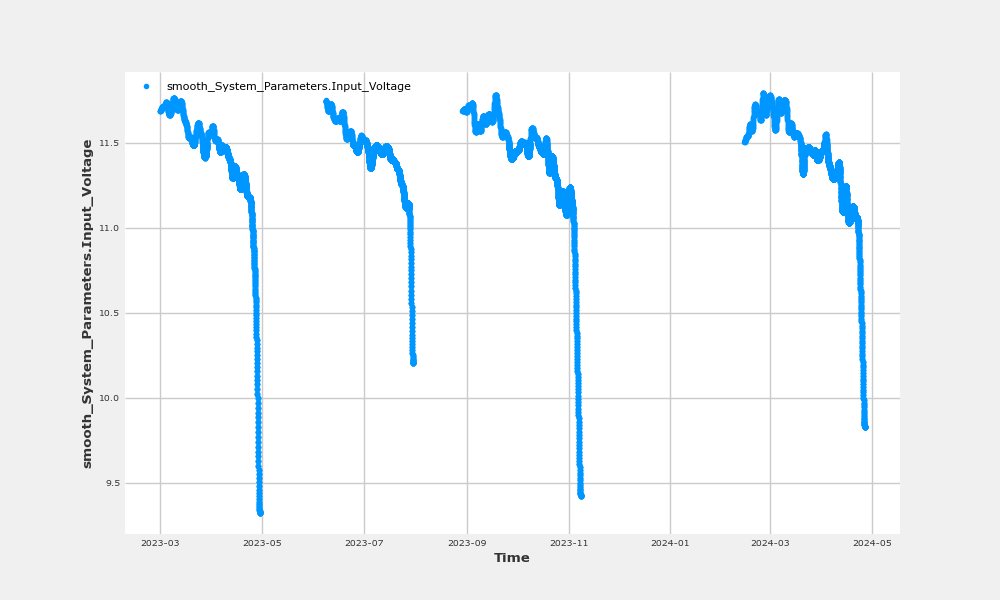

In [13]:
plot_dfs([as_df[['smooth_System_Parameters.Input_Voltage']]])

## model training

In [14]:
as_df.reset_index(inplace=True)
as_df.head(1)

,Time,Num_Not_Nan,Num_Nan,Num_Bytes,Time_Since_t0,Time_Since_t0_n,Hours_Since_t0,Days_Since_t0,Weeks_Since_t0,Months_Since_t0,...,smooth_System_Parameters.Input_Voltage,System_Parameters.Input_Voltage,Voltage_Lag1,Voltage_Diff,Voltage_Change_Rate,Rolling_Mean_Voltage,Rolling_Max_Voltage,Rolling_Std_Voltage,System_Parameters.Input_Voltage_n,smooth_System_Parameters.Input_Voltage_n
0,2023-03-01,20.0,29.0,206.0,0.0,0.0,0.0,0,0,0,...,11.688707,11.42525,NaN,NaN,NaN,11.688707,11.688707,NaN,0.794929,0.969009


In [15]:

features =  ['Num_Not_Nan',
             'Num_Not_Nan_n',
        'Num_Nan',
        'Num_Nan_n',
        'Num_Bytes',
        'Num_Bytes_n',
        #'Time_Since_t0', 
        'Time_Since_t0_n', #****
        'Days_Since_t0',
        'year', #* 
        'month_0', 
        'month_1',
        'month_2', 
        'month_3', 
        'month_4', 
        'month_5', 
        'month_6', 
        'month_7',
        'month_8', 
        'month_9', 
        'month_10', 
        'month_11', 
        'weekday_0', 
        'weekday_1',
        'weekday_2', 
        'weekday_3', 
        'weekday_4', 
        'weekday_5', 
        'weekday_6',
        'Temperature',
        'Temperature_sum', 
        #'sin_month', 
        #'cos_month', 
        'sin_week', 
        'cos_week',
        #'sin_day', 
        #'cos_day', 
        #'sin_hour', 
        #'cos_hour',
        #'smooth_System_Parameters.Input_Voltage', 
        #'System_Parameters.Input_Voltage',
        'Voltage_Lag1',
        'Voltage_Diff',
        'Voltage_Change_Rate',
        'Rolling_Mean_Voltage',
        'Rolling_Max_Voltage',
        'Rolling_Std_Voltage',
]

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Time_Since_t0_n', #****
        'Days_Since_t0',
]

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Time_Since_t0_n', #****
        'Days_Since_t0',
        'Temperature',
        'Temperature_sum',
]

features =  [#'Num_Not_Nan',
        #'Num_Nan',
        'Time_Since_t0_n', #****
        'Days_Since_t0',
        #'Time_Since_t0',
        #'Temperature',
        #'Temperature_sum',
        #'sin_hour',
        #'cos_hour',
]

features =  [
        'Time_Since_t0_n', #****
        #'Days_Since_t0',
        #'Temperature',
        #'Temperature_sum',
] # ****


features =  [
        'Hours_Since_t0',
        'Days_Since_t0',
        #'Weeks_Since_t0',
        #'Months_Since_t0',
        
        
        #'Temperature',
        #'sin_month', 
        #'cos_month',
        #'Num_Not_Nan',
        #'Voltage_Lag1',
        #'Voltage_Diff',
        #'Voltage_Change_Rate',
        #'Rolling_Mean_Voltage',
        #'Rolling_Max_Voltage',
        #'Rolling_Std_Voltage',
        #'sin_month', 
        #'cos_month',
] # ****


target = 'smooth_System_Parameters.Input_Voltage'
#target = 'System_Parameters.Input_Voltage_n'
#target = 'smooth_System_Parameters.Input_Voltage_n'

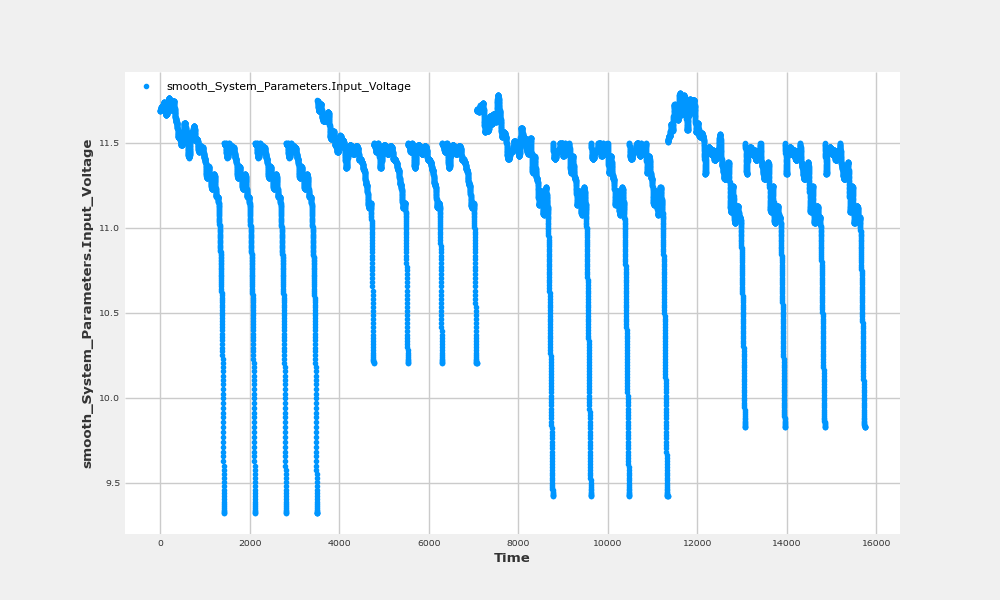

In [16]:
plot_dfs([as_df[['smooth_System_Parameters.Input_Voltage']]])

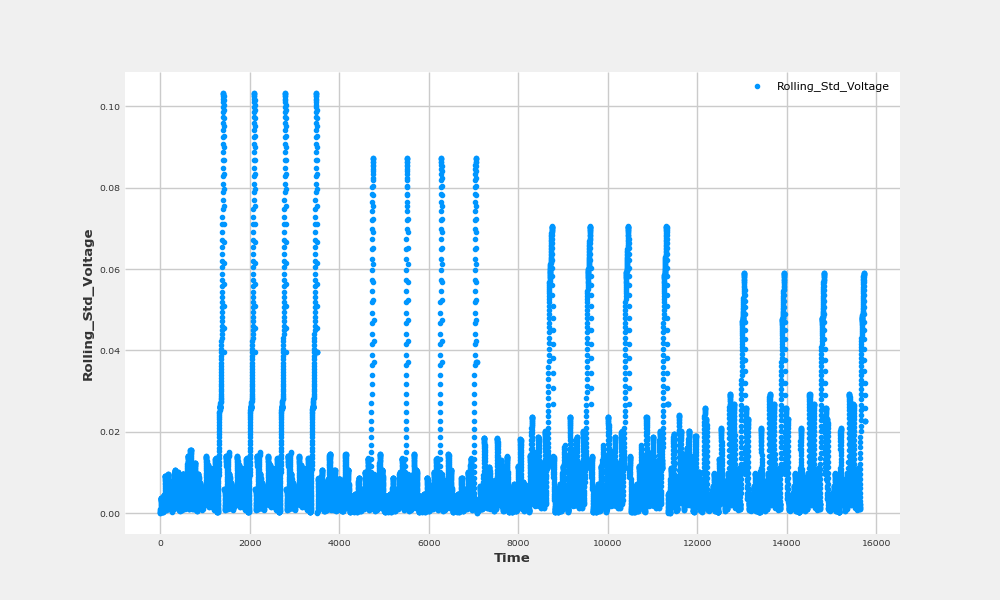

In [17]:
plot_dfs([as_df[['Rolling_Std_Voltage']]])

In [18]:
X = as_df[features].copy()
y = as_df[target].copy()
len(X), len(y)

(15746, 15746)

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# normalize X
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression (1 neuron, linear activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

c:\Users\yfess\Desktop\data\data_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 457.6729 - mae: 13.5864 - val_loss: 21.3389 - val_mae: 3.7266
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 40.0450 - mae: 5.0062 - val_loss: 18.1440 - val_mae: 3.4015
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.4121 - mae: 4.3232 - val_loss: 16.7647 - val_mae: 3.2782
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.5113 - mae: 3.8023 - val_loss: 16.6566 - val_mae: 3.3605
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.8732 - mae: 3.3994 - val_loss: 11.2152 - val_mae: 2.6744
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0319 - mae: 2.8796 - val_loss: 9.2238 - val_mae: 2.4304
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.4427 - mae: 2.5843 - val_loss: 7.6903 - val_mae: 2.2344
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6532 - mae: 2.2217 - val_loss: 5.6665 - val_mae: 1.9154
Epoch 9/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s

## loss

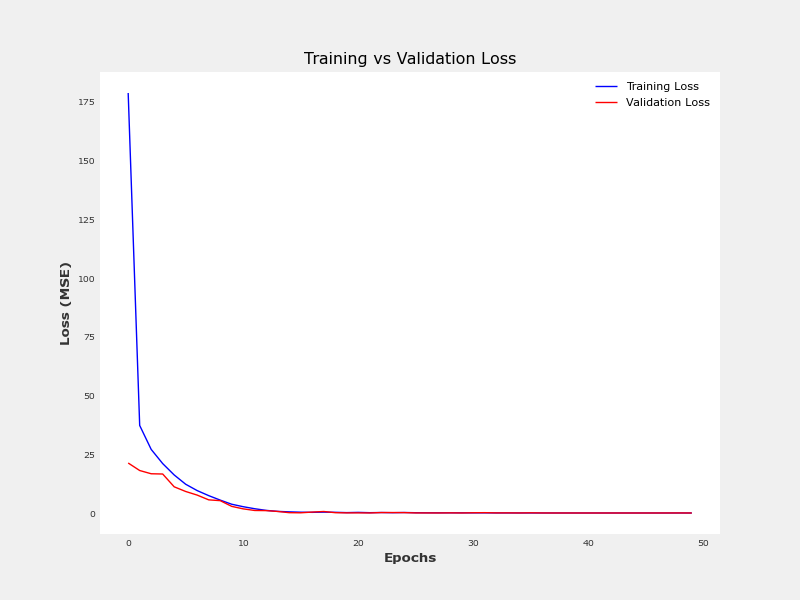

In [21]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

## Test Values vs Predictions

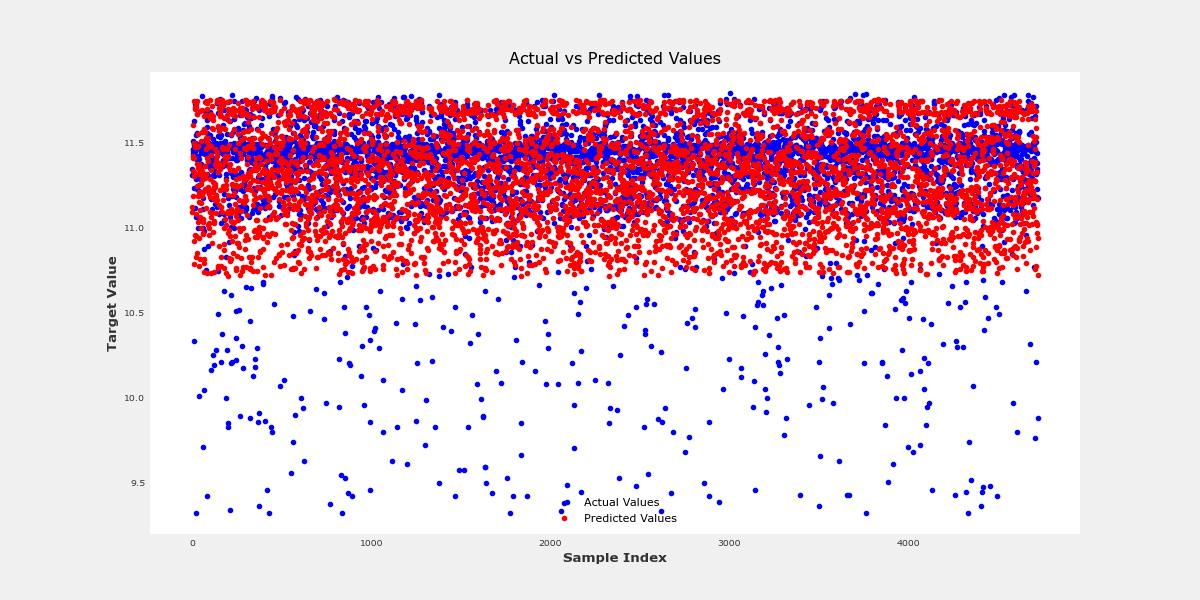

In [22]:
plt.figure(figsize=(12, 6))

# Ensure y_test and y_pred are both NumPy arrays
y_test_np = y_test.to_numpy().flatten()  # Convert y_test to a NumPy array
y_pred_np = y_pred.flatten()  # Ensure predictions are also flattened

# Get the index from y_test to use for plotting
sample_indices = np.arange(len(y_test_np))  # Create a sequential index

# Plot actual test values
plt.plot(sample_indices, y_test_np, label="Actual Values", linestyle="none", marker=".", color="blue")

# Plot predicted values
plt.plot(sample_indices, y_pred_np, label="Predicted Values", linestyle="none", marker=".", color="red")

plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

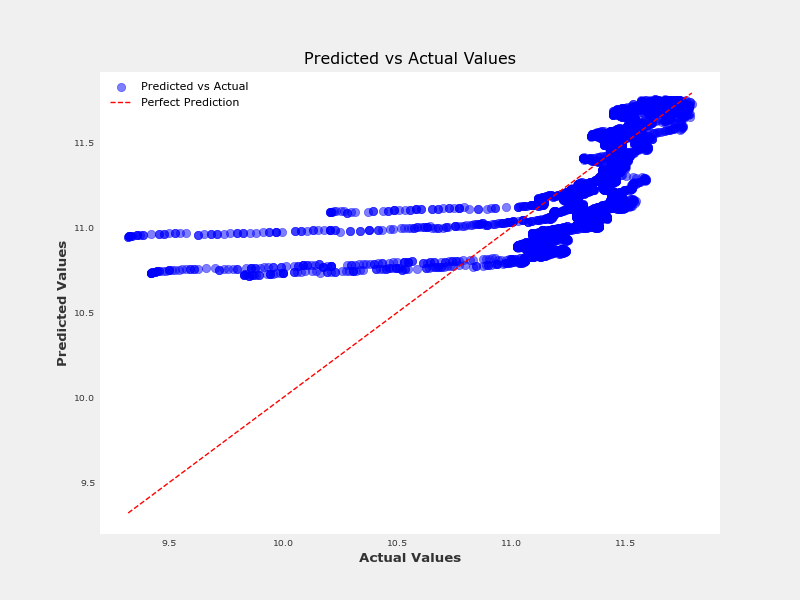

In [23]:

plt.figure(figsize=(8, 6))

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual", color="blue")

# Perfect prediction line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

## prediction as

In [24]:
seg_to_predict = Austevoll_Sor_df_segments[3][features].copy()
seg_to_predict.head(5)

,Hours_Since_t0,Days_Since_t0
Time,,
2023-03-01 00:00:00,0.0,0
2023-03-01 01:00:00,1.0,0
2023-03-01 02:00:00,2.0,0
2023-03-01 03:00:00,3.0,0
2023-03-01 04:00:00,4.0,0


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


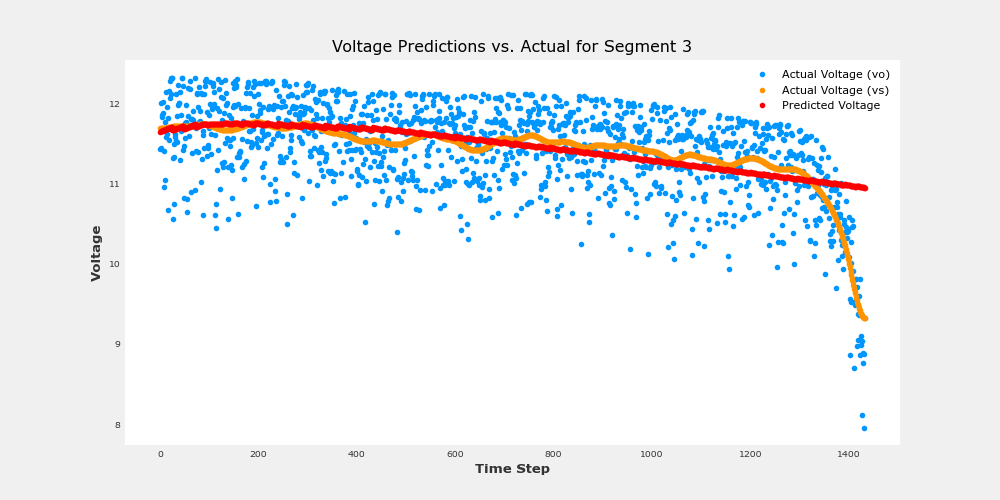

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


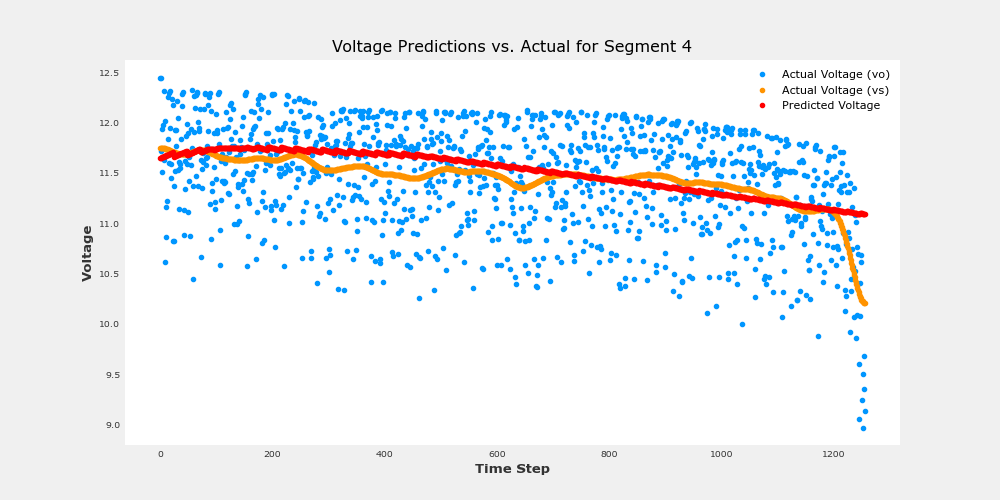

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


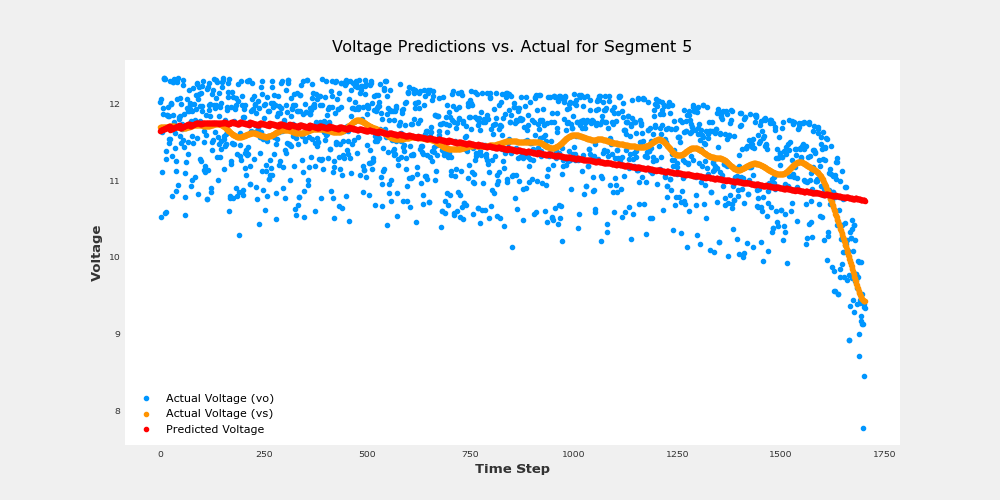

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


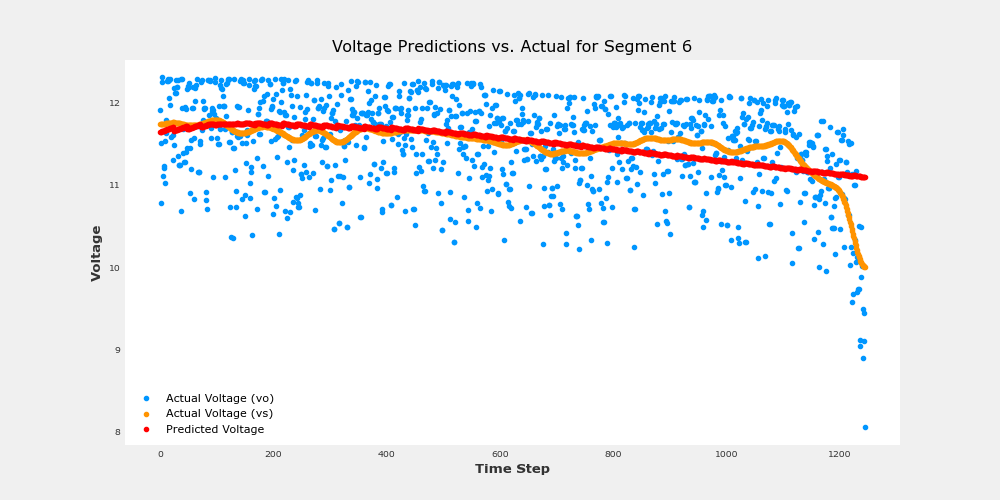

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


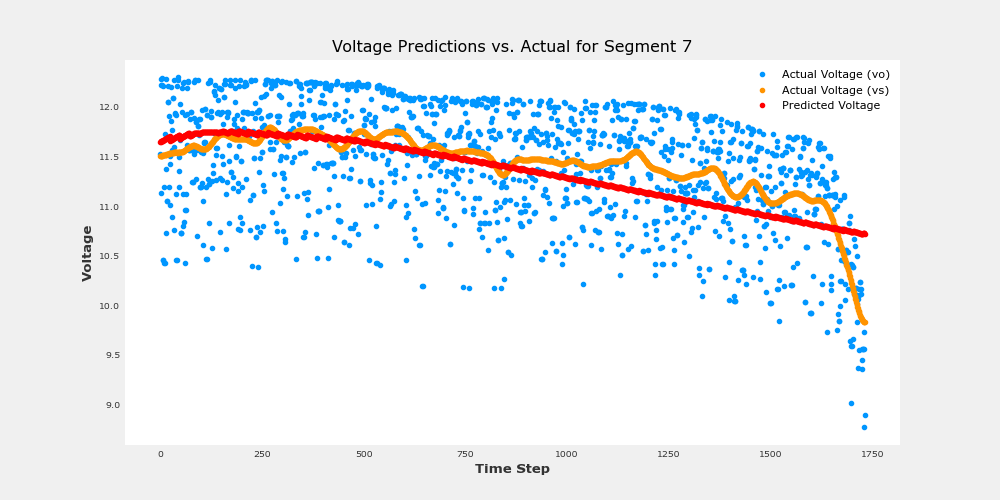

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


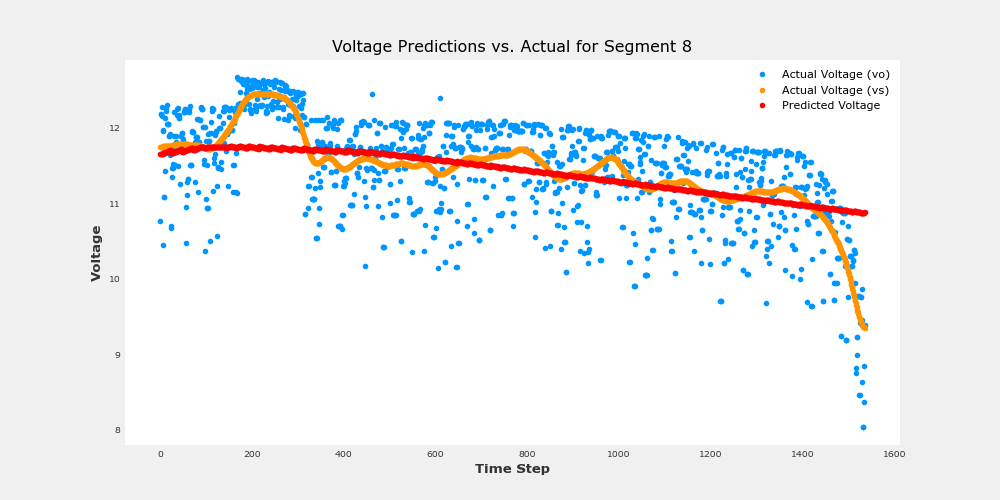

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\yfess\AppData\Local\Temp\ipykernel_26372\842244773.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


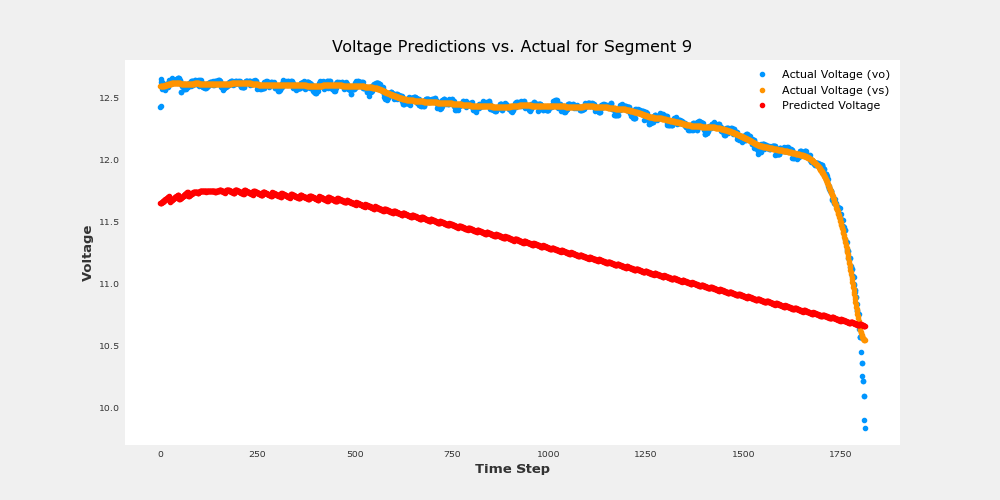

In [25]:
from feature_adder import inverse_transform
# inverse_transform(df: pd.DataFrame, column: str, scaler: Scaler)
segs_to_predict = [3, 4, 5, 6, 7, 8, 9]
for seg in segs_to_predict:
    seg_to_predict = Austevoll_Sor_df_segments[seg][features].copy()
    #seg_to_predict = scaler.transform(seg_to_predict)
    prediction = model.predict(seg_to_predict)
    plt.figure(figsize=(10, 5))
    plt.plot(Austevoll_Sor_df_segments[seg]['System_Parameters.Input_Voltage'].values, label='Actual Voltage (vo)', linestyle="none",marker=".")
    plt.plot(Austevoll_Sor_df_segments[seg]['smooth_System_Parameters.Input_Voltage'].values, label='Actual Voltage (vs)', linestyle="none",marker=".")
    plt.plot(prediction, label='Predicted Voltage', color="red",linestyle="none",marker=".")
    plt.xlabel("Time Step")
    plt.ylabel("Voltage")
    plt.title(f"Voltage Predictions vs. Actual for Segment {seg}")
    plt.legend()
    plt.show()

In [26]:
'''# Extract before transformation (keep as Series)
vo1 = Austevoll_Sor_df_segments[3]['System_Parameters.Input_Voltage'].values
v02 = Austevoll_Sor_df_segments[4]['System_Parameters.Input_Voltage'].values
vo3 = Austevoll_Sor_df_segments[5]['System_Parameters.Input_Voltage'].values
vo4 = Austevoll_Sor_df_segments[6]['System_Parameters.Input_Voltage'].values
vo5 = Austevoll_Sor_df_segments[7]['System_Parameters.Input_Voltage'].values
vo6 = Austevoll_Sor_df_segments[8]['System_Parameters.Input_Voltage'].values
vo7 = Austevoll_Sor_df_segments[9]['System_Parameters.Input_Voltage'].values

# Prepare data for prediction
seg_to_predict1 = Austevoll_Sor_df_segments[3][features].copy()
seg_to_predict1 = scaler.transform(seg_to_predict1)

seg_to_predict2 = Austevoll_Sor_df_segments[4][features].copy()
seg_to_predict2 = scaler.transform(seg_to_predict2)

seg_to_predict3 = Austevoll_Sor_df_segments[5][features].copy()
seg_to_predict3 = scaler.transform(seg_to_predict3)

seg_to_predict4 = Austevoll_Sor_df_segments[6][features].copy()
seg_to_predict4 = scaler.transform(seg_to_predict4)

seg_to_predict5 = Austevoll_Sor_df_segments[7][features].copy()
seg_to_predict5 = scaler.transform(seg_to_predict5)

seg_to_predict6 = Austevoll_Sor_df_segments[8][features].copy()
seg_to_predict6 = scaler.transform(seg_to_predict6)

seg_to_predict7 = Austevoll_Sor_df_segments[9][features].copy()
seg_to_predict7 = scaler.transform(seg_to_predict7)



# Make predictions
prediction1 = model.predict(seg_to_predict1)
prediction2 = model.predict(seg_to_predict2)
prediction3 = model.predict(seg_to_predict3)
prediction4 = model.predict(seg_to_predict4)
prediction5 = model.predict(seg_to_predict5)
prediction6 = model.predict(seg_to_predict6)
prediction7 = model.predict(seg_to_predict7)

# Plot Predictions
plt.figure(figsize=(10, 5))
#plt.plot(vo, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
plt.plot(prediction1, label='Predicted Voltage 1')
plt.plot(prediction2, label='Predicted Voltage 2')
plt.plot(prediction3, label='Predicted Voltage 3')
plt.plot(prediction4, label='Predicted Voltage 4')
plt.plot(prediction5, label='Predicted Voltage 5')
plt.plot(prediction6, label='Predicted Voltage 6')
plt.plot(prediction7, label='Predicted Voltage 7')

plt.xlabel("Time Step")
plt.ylabel("Voltage")
plt.title("Voltage Predictions vs. Actual")
plt.legend()
plt.show()
'''

'# Extract before transformation (keep as Series)\nvo1 = Austevoll_Sor_df_segments[3][\'System_Parameters.Input_Voltage\'].values\nv02 = Austevoll_Sor_df_segments[4][\'System_Parameters.Input_Voltage\'].values\nvo3 = Austevoll_Sor_df_segments[5][\'System_Parameters.Input_Voltage\'].values\nvo4 = Austevoll_Sor_df_segments[6][\'System_Parameters.Input_Voltage\'].values\nvo5 = Austevoll_Sor_df_segments[7][\'System_Parameters.Input_Voltage\'].values\nvo6 = Austevoll_Sor_df_segments[8][\'System_Parameters.Input_Voltage\'].values\nvo7 = Austevoll_Sor_df_segments[9][\'System_Parameters.Input_Voltage\'].values\n\n# Prepare data for prediction\nseg_to_predict1 = Austevoll_Sor_df_segments[3][features].copy()\nseg_to_predict1 = scaler.transform(seg_to_predict1)\n\nseg_to_predict2 = Austevoll_Sor_df_segments[4][features].copy()\nseg_to_predict2 = scaler.transform(seg_to_predict2)\n\nseg_to_predict3 = Austevoll_Sor_df_segments[5][features].copy()\nseg_to_predict3 = scaler.transform(seg_to_predict3)

In [27]:
'''seg_to_predict = Austevoll_Sor_df_segments[seg_to_predict].copy()

seg_to_predict.loc[:, ['Time_Since_t0']] = scaler.fit_transform(seg_to_predict[['Time_Since_t0']])
seg_to_predict.loc[:, ['num_not_Nan']] = scaler.fit_transform(seg_to_predict[['num_not_Nan']])

X_to_predict = seg_to_predict[['Time_Since_t0', 'num_not_Nan']].copy()

y_to_predict = seg_to_predict['System_Parameters.Input_Voltage'].copy()

y_predicted = model.predict(X_to_predict)
mse = mean_squared_error(y_to_predict, y_predicted)
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_to_predict)), y_to_predict.values, label="Actual Values", marker='o')
plt.scatter(range(len(y_predicted)), y_predicted, label="Predicted Values", marker='x')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("System_Parameters.Input_Voltage")
plt.legend()
plt.grid()
plt.show()'''

'seg_to_predict = Austevoll_Sor_df_segments[seg_to_predict].copy()\n\nseg_to_predict.loc[:, [\'Time_Since_t0\']] = scaler.fit_transform(seg_to_predict[[\'Time_Since_t0\']])\nseg_to_predict.loc[:, [\'num_not_Nan\']] = scaler.fit_transform(seg_to_predict[[\'num_not_Nan\']])\n\nX_to_predict = seg_to_predict[[\'Time_Since_t0\', \'num_not_Nan\']].copy()\n\ny_to_predict = seg_to_predict[\'System_Parameters.Input_Voltage\'].copy()\n\ny_predicted = model.predict(X_to_predict)\nmse = mean_squared_error(y_to_predict, y_predicted)\nprint(f"Mean Squared Error: {mse:.4f}")\n\nplt.figure(figsize=(10, 6))\nplt.scatter(range(len(y_to_predict)), y_to_predict.values, label="Actual Values", marker=\'o\')\nplt.scatter(range(len(y_predicted)), y_predicted, label="Predicted Values", marker=\'x\')\nplt.title("Actual vs Predicted Values")\nplt.xlabel("Sample Index")\nplt.ylabel("System_Parameters.Input_Voltage")\nplt.legend()\nplt.grid()\nplt.show()'

## ausevoll nord

### Get Data

In [28]:
Austevoll_Nord_file_path =  "row_data\\Austevoll_Nord\\Austevoll_data_instrument.feather"
print(Austevoll_Nord_file_path)
Austevoll_Nord_df = pd.read_feather(Austevoll_Nord_file_path)
Austevoll_Nord_df.set_index('Time', inplace=True)
len(Austevoll_Nord_df)

row_data\Austevoll_Nord\Austevoll_data_instrument.feather


24219

In [29]:
len(Austevoll_Nord_df.columns)

26

In [30]:
for col in Austevoll_Nord_df.columns:
    print(col)

Long
Lat
Conductivity_Sensor.Conductivity
Conductivity_Sensor.Temperature
Conductivity_Sensor.Salinity
Conductivity_Sensor.Density
Conductivity_Sensor.Soundspeed
Pressure_Sensor.Pressure
Pressure_Sensor.Temperature
Doppler_Current_Profiler_Sensor.Record_State
Doppler_Current_Profiler_Sensor.Ping_Count
System_Parameters.Input_Voltage
System_Parameters.Memory_Used
SeaBird_SBE.Temperature
SeaBird_SBE.Conductivity
SeaBird_SBE.Pressure
SeaBird_SBE.Oxygen
SeaBird_SBE.Sound_Velocity
Doppler_Current_Profiler_Sensor.Heading
Doppler_Current_Profiler_Sensor.Std_Dev_Heading
Doppler_Current_Profiler_Sensor.Pitch
Doppler_Current_Profiler_Sensor.Roll
Doppler_Current_Profiler_Sensor.Abs_Tilt
Doppler_Current_Profiler_Sensor.Max_Tilt
Doppler_Current_Profiler_Sensor.Std_Dev_Tilt
Doppler_Current_Profiler_Sensor.Tilt_Direction


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


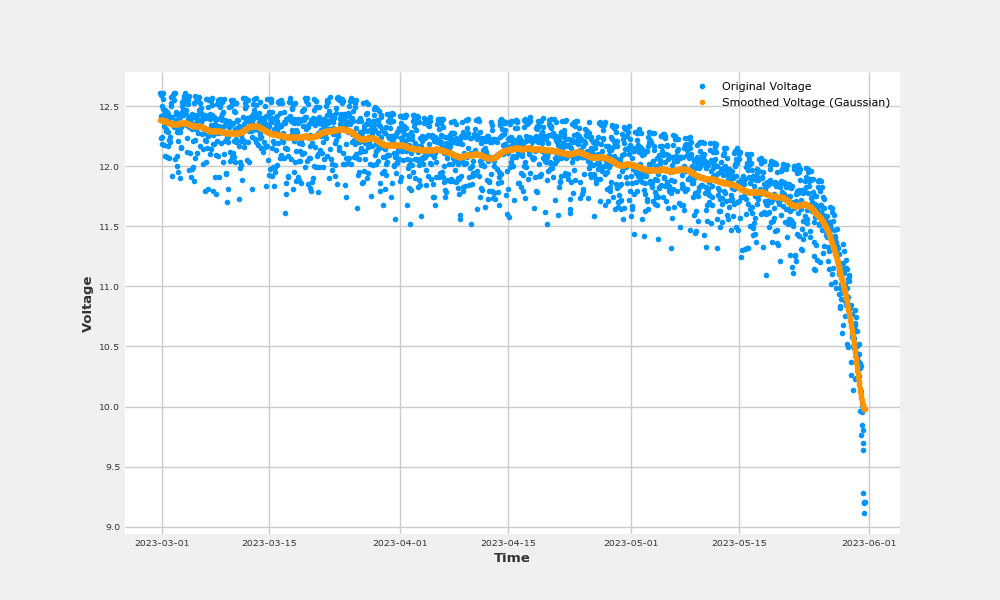

KeyError: "['Voltage_Lag1', 'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage', 'Rolling_Max_Voltage', 'Rolling_Std_Voltage'] not in index"

In [31]:
an_list_segments = [2,3,5,7]
Austevoll_Nord_df_segments = setup_an_data(Austevoll_Nord_df, smooth_sigma=18, list_segments=an_list_segments)

### Normalize input voltage for each segment using Scalar

In [ ]:
from feature_adder import normalize_data

an_seg_scalers_iv = {}

for seg_key, seg_df in Austevoll_Nord_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'System_Parameters.Input_Voltage')
    
    Austevoll_Nord_df_segments[seg_key] = seg_df
    
    an_seg_scalers_iv[seg_key] = scaler_y



an_seg_scalers_siv = {}
for seg_key, seg_df in Austevoll_Nord_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'smooth_System_Parameters.Input_Voltage')
    
    Austevoll_Nord_df_segments[seg_key] = seg_df
    
    an_seg_scalers_siv[seg_key] = scaler_y

an_seg_scalers_iv, an_seg_scalers_siv

({2: Scaler, 3: Scaler, 5: Scaler, 7: Scaler},
 {2: Scaler, 3: Scaler, 5: Scaler, 7: Scaler})

## prediction an

In [ ]:
seg_to_predict = Austevoll_Nord_df_segments[3][features].copy()
seg_to_predict.head(1)

,Time_Since_t0_n
Time,
2023-06-07 12:00:00,0.0


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


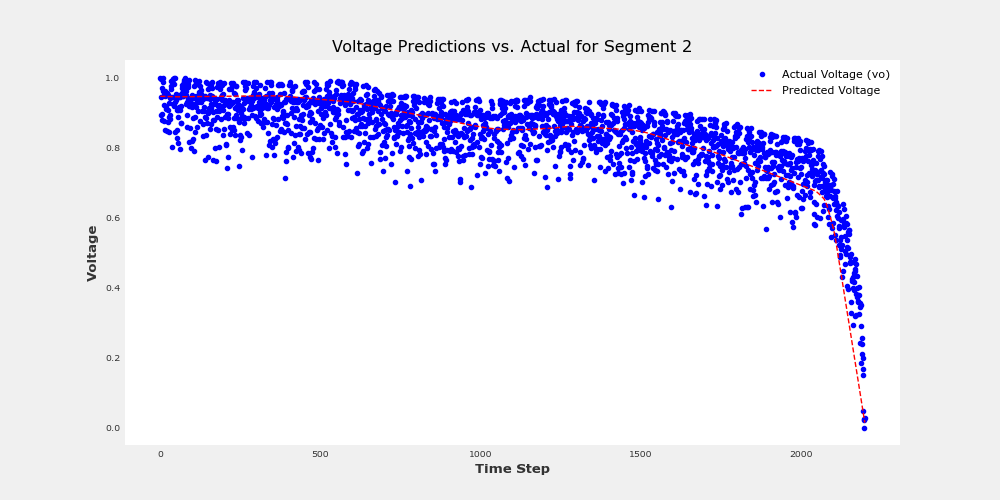

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


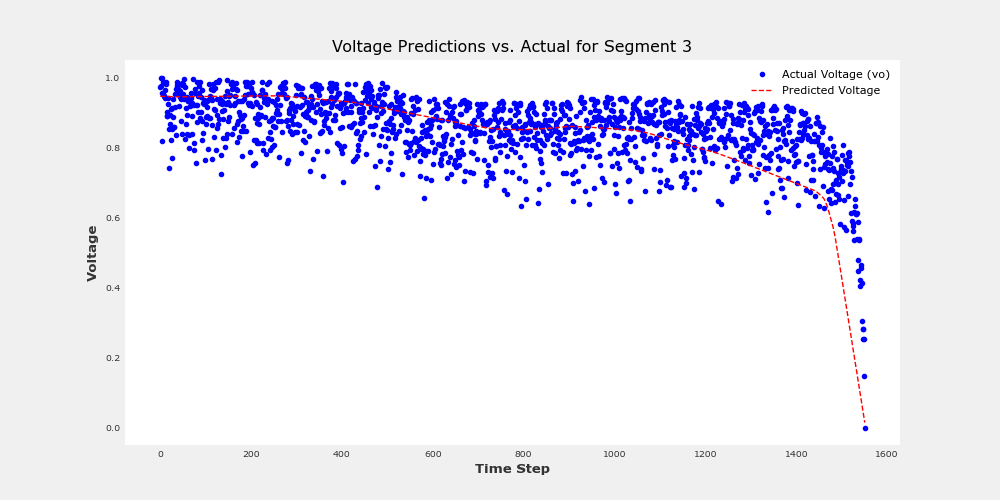

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


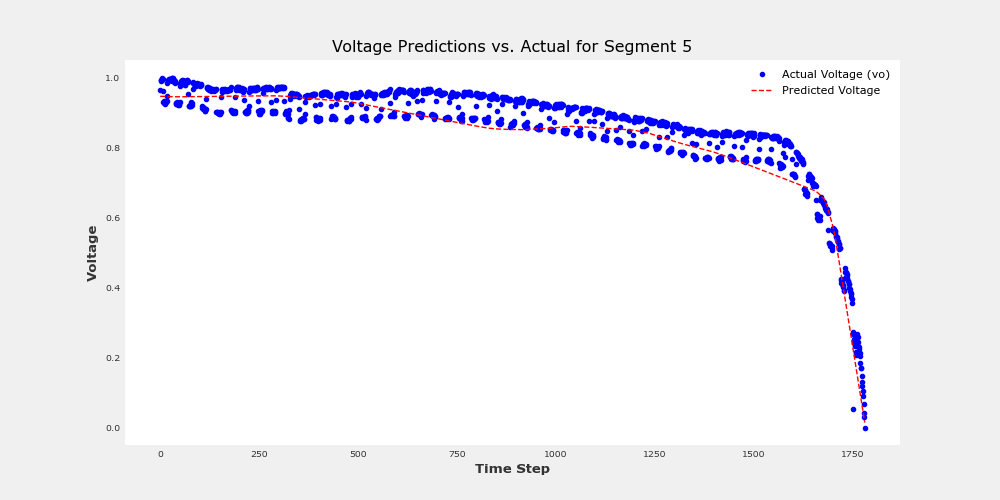

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


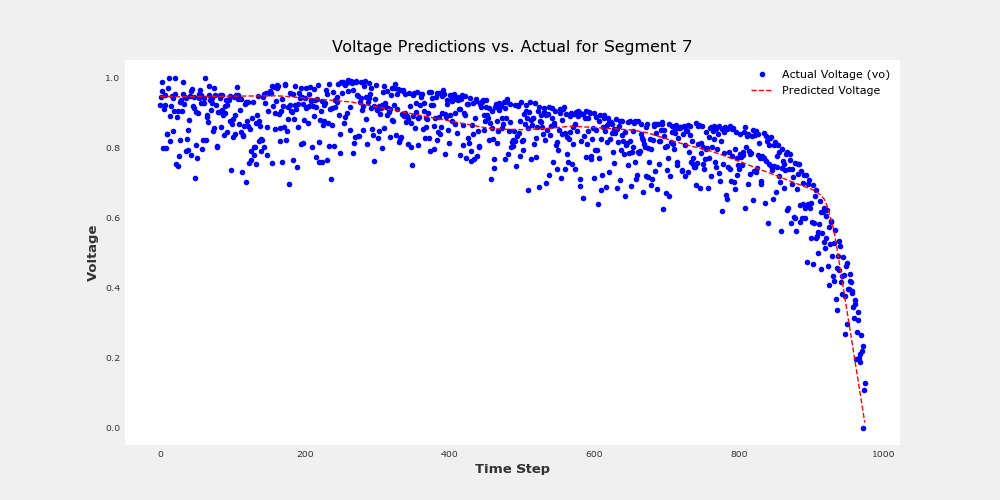

In [ ]:
from feature_adder import inverse_transform
# inverse_transform(df: pd.DataFrame, column: str, scaler: Scaler)
segs_to_predict = [2,3,5,7]
for seg in segs_to_predict:
    seg_to_predict = Austevoll_Nord_df_segments[seg][features].copy()
    seg_to_predict = scaler.transform(seg_to_predict)
    prediction = model.predict(seg_to_predict)
    plt.figure(figsize=(10, 5))
    plt.plot(Austevoll_Nord_df_segments[seg]['System_Parameters.Input_Voltage_n'].values, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
    plt.plot(prediction, label='Predicted Voltage', linestyle="dashed", color="red")
    plt.xlabel("Time Step")
    plt.ylabel("Voltage")
    plt.title(f"Voltage Predictions vs. Actual for Segment {seg}")
    plt.legend()
    plt.show()

# ten month

In [ ]:
import pandas as pd
import numpy as np

# 1. Generate a datetime index from today over 4 months with hourly frequency
start_time = pd.Timestamp.now().normalize()
end_time = start_time + pd.DateOffset(months=2)
datetime_index = pd.date_range(start=start_time, end=end_time, freq='H')

# 2. Create the DataFrame
df = pd.DataFrame(index=datetime_index)
df.index.name = "Time"

# 3. Calculate time since t0 (in hours)
df["Time_Since_t0"] = (df.index - df.index[0]).total_seconds()

t0 = df.index[0]
df['Days_Since_t0'] = (df.index - t0).days
df['Weeks_Since_t0'] = (df.index - t0).days // 7
df['Months_Since_t0'] = (df.index - t0).days // 30
df['year'] = df.index.year


# 4. Reset index if you want Timestamp as a column (optional)
df = df.reset_index()


df, df_scaler = seg_df, scaler_y = normalize_data(df, 'Time_Since_t0')

# 5. Display the first few rows
df.head()

C:\Users\yfess\AppData\Local\Temp\ipykernel_27476\4266726068.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_index = pd.date_range(start=start_time, end=end_time, freq='H')


,Time,Time_Since_t0,Days_Since_t0,Weeks_Since_t0,Months_Since_t0,year,Time_Since_t0_n
time,,,,,,,
0,2025-04-02 00:00:00,0.0,0,0,0,2025,0.000000
1,2025-04-02 01:00:00,3600.0,0,0,0,2025,0.000683
2,2025-04-02 02:00:00,7200.0,0,0,0,2025,0.001366
3,2025-04-02 03:00:00,10800.0,0,0,0,2025,0.002049
4,2025-04-02 04:00:00,14400.0,0,0,0,2025,0.002732


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


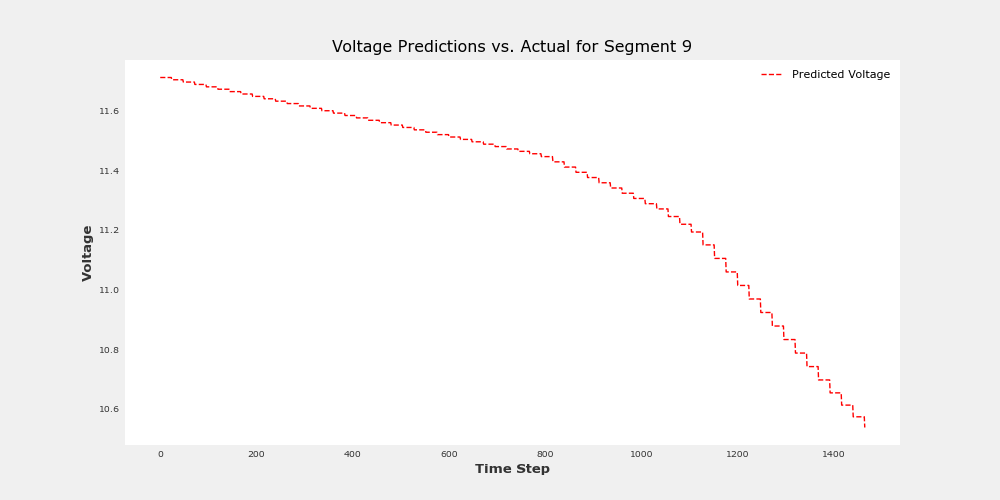

In [ ]:
seg_to_predict = df[features].copy()

#seg_to_predict = scaler.transform(seg_to_predict)

prediction = model.predict(seg_to_predict)

plt.figure(figsize=(10, 5))
plt.plot(prediction, label='Predicted Voltage', linestyle="dashed", color="red")
plt.xlabel("Time Step")
plt.ylabel("Voltage")
plt.title(f"Voltage Predictions vs. Actual for Segment {seg}")
plt.legend()
plt.show()

# fin